In [1]:
#! apt-get install default-jre
#!java -version
!pip install h2o
import h2o
from h2o.automl import H2OAutoML

h2o.init()

  Running setup.py bdist_wheel for h2o: started
  Running setup.py bdist_wheel for h2o: finished with status 'done'
  Stored in directory: C:\Users\pramo\AppData\Local\pip\Cache\wheels\0d\17\52\9ea300738f719aca7b88a790ce94b8c928e7c6098e72627c7f
  Running setup.py bdist_wheel for tabulate: started
  Running setup.py bdist_wheel for tabulate: finished with status 'done'
  Stored in directory: C:\Users\pramo\AppData\Local\pip\Cache\wheels\2a\85\33\2f6da85d5f10614cbe5a625eab3b3aebfdf43e7b857f25f829
Successfully built h2o tabulate


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\pramo\AppData\Local\Temp\tmpf_j4yh5_
  JVM stdout: C:\Users\pramo\AppData\Local\Temp\tmpf_j4yh5_\h2o_pramo_started_from_python.out
  JVM stderr: C:\Users\pramo\AppData\Local\Temp\tmpf_j4yh5_\h2o_pramo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,"7 days, 19 hours and 44 minutes"
H2O cluster name:,H2O_from_python_pramo_osbk1z
H2O cluster total nodes:,1
H2O cluster free memory:,3.524 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [7]:
import json
import pandas as pd

In [8]:
#Importing AutoML dataset from json file

with open('data_automl.json','r') as f:
    data_all = f.read()
    
data = json.loads(data_all)

In [12]:
data_automl = pd.DataFrame.from_dict(data)
print(data_automl.shape)
data_automl.head()

(622, 13)


,AWS_Negative_Score,AWS_Neutral_Score,AWS_Positive_Score,AZURE_Overall_Score,GCP_Magnitude,GCP_Score,IBM_Overall_Score,Sentiment,Text_ID,VADER_Negative_Score,VADER_Neutral_Score,VADER_Overall_Score,VADER_Positive_Score
0,0.000141,0.998418,0.001304,0.500000,0.0,0.0,0.000000,Neutral,1,0.000,1.000,0.0000,0.000
1,0.003760,0.487941,0.495716,0.891742,0.9,0.1,0.750129,Neutral,2,0.000,0.848,0.7096,0.152
10,0.000835,0.027987,0.940531,0.942766,2.3,0.3,0.776391,Positive,11,0.017,0.790,0.9123,0.192
100,0.482647,0.247408,0.037411,0.762388,1.6,0.2,0.438461,Negative,101,0.000,0.958,0.3919,0.042
101,0.033947,0.533266,0.419496,0.772392,1.1,0.5,0.551895,Positive,102,0.000,0.836,0.8020,0.164


In [21]:
X = pd.DataFrame()
Y = pd.DataFrame()
X = data_automl.drop(['Sentiment','Text_ID'], axis=1)
Y['Sentiment'] = data_automl['Sentiment']

In [22]:
X.head()

,AWS_Negative_Score,AWS_Neutral_Score,AWS_Positive_Score,AZURE_Overall_Score,GCP_Magnitude,GCP_Score,IBM_Overall_Score,VADER_Negative_Score,VADER_Neutral_Score,VADER_Overall_Score,VADER_Positive_Score
0,0.000141,0.998418,0.001304,0.500000,0.0,0.0,0.000000,0.000,1.000,0.0000,0.000
1,0.003760,0.487941,0.495716,0.891742,0.9,0.1,0.750129,0.000,0.848,0.7096,0.152
10,0.000835,0.027987,0.940531,0.942766,2.3,0.3,0.776391,0.017,0.790,0.9123,0.192
100,0.482647,0.247408,0.037411,0.762388,1.6,0.2,0.438461,0.000,0.958,0.3919,0.042
101,0.033947,0.533266,0.419496,0.772392,1.1,0.5,0.551895,0.000,0.836,0.8020,0.164


In [23]:
Y.head()

,Sentiment
0,Neutral
1,Neutral
10,Positive
100,Negative
101,Positive


In [39]:
x = list(data_automl.columns)
x.remove('Sentiment')
x.remove('Text_ID')
y = ['Sentiment']

In [40]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_automl, test_size=0.2)

In [53]:
train_h2o = h2o.H2OFrame(train)
test_h2o = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [24]:
auto_h2o =  H2OAutoML(max_models=20, seed=1, max_runtime_secs=300)

In [55]:
auto_h2o.train(x=x, y="Sentiment", training_frame=train_h2o)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [56]:
lb = auto_h2o.leaderboard
lb

model_id,mean_per_class_error,logloss,rmse,mse
GBM_grid_1_AutoML_20181130_033412_model_3,0.537738,1.5945,0.600412,0.360495
GBM_2_AutoML_20181130_033412,0.537967,0.906346,0.565543,0.319839
DRF_1_AutoML_20181130_033412,0.541383,1.67403,0.567739,0.322327
GBM_4_AutoML_20181130_033412,0.545429,0.913898,0.566863,0.321334
XRT_1_AutoML_20181130_033412,0.555336,2.93213,0.564202,0.318324
GBM_3_AutoML_20181130_033412,0.559853,0.907445,0.566164,0.320542
DeepLearning_grid_1_AutoML_20181130_033412_model_1,0.563156,2.79027,0.617379,0.381157
GBM_grid_1_AutoML_20181130_033412_model_5,0.56483,1.08497,0.662051,0.438312
DeepLearning_grid_1_AutoML_20181130_033412_model_3,0.568217,3.03089,0.644091,0.414853
DeepLearning_1_AutoML_20181130_033412,0.56937,0.98269,0.580657,0.337163


In [57]:
auto_h2o.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_20181130_033412_model_3


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.00026240216154851086
RMSE: 0.01619883210446083
LogLoss: 0.010448012871897098
Mean Per-Class Error: 0.0
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Negative,Neutral,Positive,Error,Rate
49.0,0.0,0.0,0.0,0 / 49
0.0,176.0,0.0,0.0,0 / 176
0.0,0.0,222.0,0.0,0 / 222
49.0,176.0,222.0,0.0,0 / 447


Top-3 Hit Ratios: 


k,hit_ratio
1,1.0
2,1.0
3,1.0



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.2861926353392296
RMSE: 0.5349697517983887
LogLoss: 1.1939690249511514
Mean Per-Class Error: 0.5213032581453634
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Negative,Neutral,Positive,Error,Rate
0.0,1.0,2.0,1.0,3 / 3
1.0,11.0,7.0,0.4210526,8 / 19
0.0,4.0,24.0,0.1428571,4 / 28
1.0,16.0,33.0,0.3,15 / 50


Top-3 Hit Ratios: 


k,hit_ratio
1,0.7
2,0.86
3,1.0



ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.3604950014848547
RMSE: 0.6004123595370557
LogLoss: 1.5944990274701536
Mean Per-Class Error: 0.5377381091666806
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Negative,Neutral,Positive,Error,Rate
9.0,19.0,21.0,0.8163265,40 / 49
14.0,96.0,66.0,0.4545455,80 / 176
9.0,67.0,146.0,0.3423423,76 / 222
32.0,182.0,233.0,0.4384787,196 / 447


Top-3 Hit Ratios: 


k,hit_ratio
1,0.5615212
2,0.8702460
3,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.5616480,0.0332915,0.5222222,0.5444444,0.6516854,0.5280899,0.5617977
err,0.4383520,0.0332915,0.4777778,0.4555556,0.3483146,0.4719101,0.4382023
err_count,39.2,3.0463092,43.0,41.0,31.0,42.0,39.0
logloss,1.5949159,0.0921509,1.4166772,1.5868403,1.6501456,1.8044055,1.5165106
max_per_class_error,0.8262005,0.0753699,0.8,0.8181818,1.0,0.6666667,0.8461539
mean_per_class_accuracy,0.4613613,0.0124819,0.4320513,0.4511808,0.4676732,0.4795321,0.4763692
mean_per_class_error,0.5386386,0.0124819,0.5679487,0.5488192,0.5323268,0.5204678,0.5236309
mse,0.3604068,0.0200849,0.3837192,0.3765293,0.3194871,0.3890338,0.3332646
r2,0.1966288,0.0630653,0.1855017,0.2315729,0.1444702,0.0779364,0.3436627
rmse,0.5998638,0.0168854,0.6194508,0.6136198,0.5652319,0.6237257,0.5772907


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2018-11-30 03:34:27,2.172 sec,0.0,0.6666667,1.0986123,0.5771812,0.6666667,1.0986123,0.6
,2018-11-30 03:34:27,2.187 sec,5.0,0.3342101,0.3753947,0.0894855,0.5587832,0.8909412,0.38
,2018-11-30 03:34:27,2.201 sec,10.0,0.2117835,0.1938330,0.0201342,0.5198513,0.8383293,0.36
,2018-11-30 03:34:27,2.215 sec,15.0,0.1212627,0.0962317,0.0044743,0.5322554,0.9399694,0.36
,2018-11-30 03:34:27,2.230 sec,20.0,0.0711328,0.0507783,0.0,0.5340997,0.9957640,0.36
,2018-11-30 03:34:27,2.244 sec,25.0,0.0388995,0.0276334,0.0,0.5454825,1.1570096,0.36
,2018-11-30 03:34:27,2.258 sec,30.0,0.0232489,0.0161335,0.0,0.5346711,1.1679120,0.34
,2018-11-30 03:34:27,2.270 sec,34.0,0.0161988,0.0104480,0.0,0.5349698,1.1939690,0.3


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
GCP_Magnitude,34.9105034,1.0,0.1190627
IBM_Overall_Score,33.2178001,0.9515131,0.1132897
AWS_Negative_Score,33.1264038,0.9488950,0.1129780
AWS_Positive_Score,32.1895752,0.9220599,0.1097830
VADER_Overall_Score,31.8302040,0.9117658,0.1085573
VADER_Neutral_Score,26.3121262,0.7537023,0.0897379
VADER_Positive_Score,26.2948055,0.7532061,0.0896788
AWS_Neutral_Score,24.8183498,0.7109135,0.0846433
GCP_Score,21.0250683,0.6022562,0.0717063
AZURE_Overall_Score,20.7877884,0.5954594,0.0708970


In [59]:
preds = auto_h2o.predict(test_h2o)
preds

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,Negative,Neutral,Positive
Neutral,9.63936e-05,0.976218,0.0236859
Neutral,0.00122088,0.970854,0.0279249
Neutral,3.56843e-05,0.942196,0.0577683
Neutral,3.31316e-05,0.960528,0.0394386
Positive,0.0208534,0.0820897,0.897057
Neutral,0.00217477,0.959191,0.0386347
Positive,1.02488e-06,0.00050439,0.999495
Neutral,0.00275107,0.989081,0.00816795
Neutral,0.000118361,0.975614,0.0242673
Positive,0.000560717,0.00240094,0.997038


In [60]:
preds = preds.as_data_frame(use_pandas=True)

In [61]:
preds.head()

,predict,Negative,Neutral,Positive
0,Neutral,0.000096,0.976218,0.023686
1,Neutral,0.001221,0.970854,0.027925
2,Neutral,0.000036,0.942196,0.057768
3,Neutral,0.000033,0.960528,0.039439
4,Positive,0.020853,0.082090,0.897057


In [63]:
!pip install pandas_ml
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

  Running setup.py bdist_wheel for pandas-ml: started
  Running setup.py bdist_wheel for pandas-ml: finished with status 'done'
  Stored in directory: C:\Users\pramo\AppData\Local\pip\Cache\wheels\4b\b0\88\51fb7203a0f81becae3e92d5bf9fee0460375e5408e67a7dc3
Successfully built pandas-ml


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [76]:
y_true = list(test['Sentiment'])
y_pred_h2o = list(preds['predict'])

Accuracy Score:  0.6
Predicted  Negative  Neutral  Positive  __all__
Actual                                         
Negative          1        5         4       10
Neutral           1       32        15       48
Positive          2       23        42       67
__all__           4       60        61      125


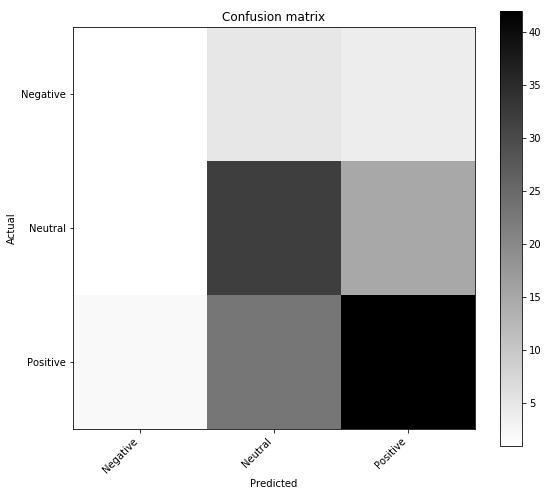

In [77]:
# Compute confusion matrix with Manual Sentiment analysis and result from AWS API:

cnf_matrix_h2o = ConfusionMatrix(y_true, y_pred_h2o)
acc_score_h2o = accuracy_score(y_true, y_pred_h2o)

print('Accuracy Score: ', acc_score_h2o)

print(cnf_matrix_h2o)

cnf_matrix_h2o.plot()
plt.show()